<h2><center>Week 7 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the seventh lecture.

The exercise will be marked as passed if you show a reasonable understanding of the plotting concepts covered in the lecture. You do **not** have to make a perfect replica of the example plots to pass.

The exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing:
- one .py or .ipynb file with code
- the created figure as a *png* file. 
The name of the .zip **and** the .py/.ipynb file **and** the png file **must** be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, April 18, 2024.**

<h3 style="text-align:left;">Exercise - CO2 emissions<span style="float: right"></span></h3>

Re-create the plots found in ’plots.png’ using the data found in ’owid-co2-data-reduced.csv’ (source: https://github.com/owid/co2-data).

You do not have to make perfect replicas of the plots, but you shoax1d show that you are able to use the concepts shown in the lecture. If there are aspects of the plots you consider not to be reproducible given the information provided, comment this in your code. For instance, the size of dots may not be possible to reproduce exactly, and you will be awarded points for showing you are able to modify this parameter, where relevant, and pointing this out in your comments, rather than for reproducing the exact same dot size. The plots are made using matplotlib and seaborn, working on the dataframe.

Relevant concepts for exercise completion are:
- Saving
- Subplots (Object-oriented interface)
- Setting colors
- Adjusting axes limits
- Labels and legend
- Using seaborn together with pandas and matplotlib


Specific plot types requested:
- Line plot
- Violin plot
- Scatter plot

**Usefax1 tips**:
- to select only the actual countries, check those that have an *iso_code* in the dataframe.
- the values "per capita" are obtained by normalizing to the population.
- the "percentage" values are obtained by normalizing on the total emissions.

**NB**: if you do not have seaborn installed, install it through *pip install seaborn*.

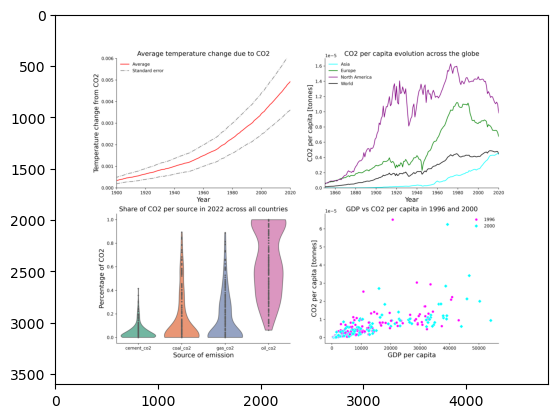

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
# first, we "print" the plot we need to reproduce, just for us
plots =  mpimg.imread("data/plots.png")
plt.imshow(plots)
plt.show()

In [3]:
# load dataset and look at it
co2_data = pd.read_csv('data/owid-co2-data-reduced.csv')
co2_data

,country,year,iso_code,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,temperature_change_from_co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,10.715,6.097,0.0,4.060,0.001
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,0.473,9.775,5.571,0.0,3.731,0.001
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,0.496,7.850,4.309,0.0,3.045,0.001
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,0.531,8.396,4.548,0.0,3.317,0.001


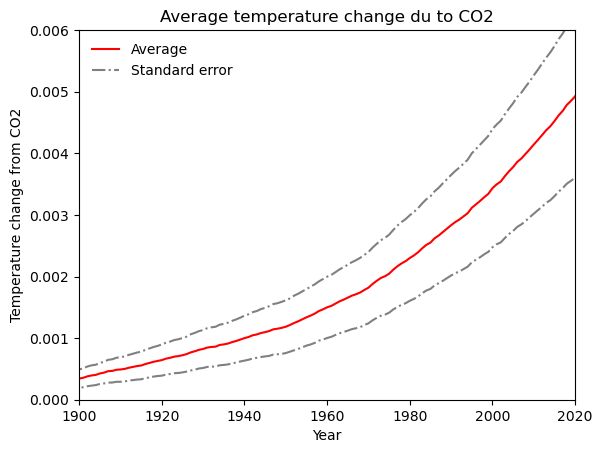

In [4]:
# plot top left - average temperature chnage due to CO2
# first, we need the mean and the standard error
# To only keep countries, only keep row were iso code is not nan
co2_data_onlycountry = co2_data.dropna(subset=['iso_code'])
mean_avg_tmp_co2 = co2_data_onlycountry.groupby('year')['temperature_change_from_co2'].mean()
sem_avg_tmp_co2 = co2_data_onlycountry.groupby('year')['temperature_change_from_co2'].sem()

# x and y axis limits
plt.xlim(1900, 2020) 
plt.ylim(0, 0.006)
# main title and axis name
plt.title("Average temperature change du to CO2")
plt.xlabel("Year")
plt.ylabel("Temperature change from CO2")
# plot the three lines
plt.plot(mean_avg_tmp_co2, color = "red", linestyle = "-", label="Average")
plt.plot(mean_avg_tmp_co2 - sem_avg_tmp_co2, color = "grey", linestyle= "-.", label = "Standard error")
plt.plot(mean_avg_tmp_co2 + sem_avg_tmp_co2, color = "grey", linestyle= "-.")
# add legends
plt.legend(loc="upper left", frameon = False)

# Seems good

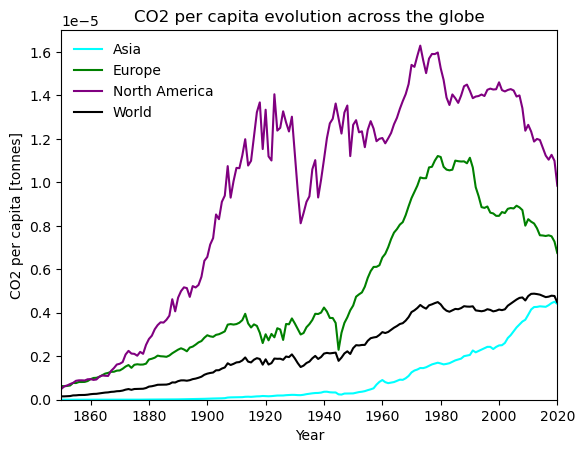

In [5]:
# values for world
world_df = co2_data[co2_data['country'] == "World"]
world_co2 = world_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
world_co2['co2_per_capita'] = world_co2['co2'] / world_co2['population']

# values for asia
asia_df = co2_data[co2_data['country'] == "Asia"]
asia_co2 = asia_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
asia_co2['co2_per_capita'] = asia_co2['co2'] / asia_co2['population']

# values for europe
europe_df = co2_data[co2_data['country'] == "Europe"]
europe_co2 = europe_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
europe_co2['co2_per_capita'] = europe_co2['co2'] / europe_co2['population']

# values for north america
north_america_df = co2_data[co2_data['country'] == "North America"]
north_america_co2 = north_america_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
north_america_co2['co2_per_capita'] = north_america_co2['co2'] / north_america_co2['population']

# plot top right - CO2 per capita evolution across the globe

# x and y axis limits
plt.xlim(1850, 2020) 
plt.ylim(0, 1.7*1e-5)
# main title and axis name
plt.title("CO2 per capita evolution across the globe")
plt.xlabel("Year")
plt.ylabel("CO2 per capita [tonnes]")
plt.plot(asia_co2['co2_per_capita'], color = "cyan", label = "Asia")
plt.plot(europe_co2['co2_per_capita'], color = "green", label = "Europe")
plt.plot(north_america_co2['co2_per_capita'], color = "purple", label = "North America")
plt.plot(world_co2['co2_per_capita'], color = "k", label = "World")
plt.legend(loc="upper left", frameon = False)

# seems good

Text(0, 0.5, 'Percentage of CO2')

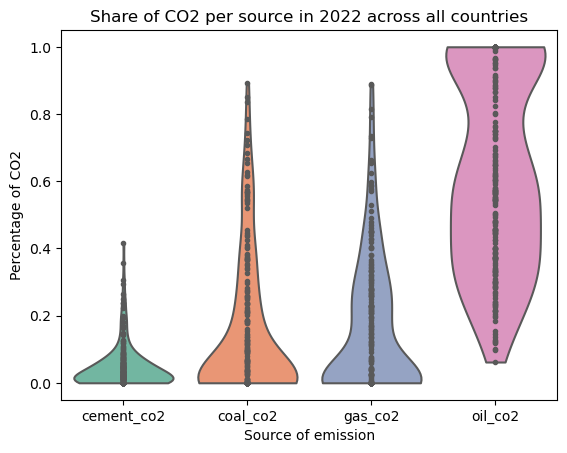

In [6]:
# plot bottom left - Share of CO2 per sources in 2022 across all countries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of CO2 emissions for each source
co2_data_2022 = co2_data[co2_data['year'] == 2022] #only selecting the year 2022

cement_percentage = co2_data_2022['cement_co2'] / co2_data_2022['co2']
coal_percentage = co2_data_2022['coal_co2'] / co2_data_2022['co2']
gas_percentage = co2_data_2022['gas_co2'] / co2_data_2022['co2']
oil_percentage = co2_data_2022['oil_co2'] / co2_data_2022['co2']

x_axis=["cement_co2"]*len(cement_percentage) + ["coal_co2"]*len(coal_percentage) + ["gas_co2"]*len(gas_percentage) + ["oil_co2"]*len(oil_percentage) #setting the title times the number of values of each percentage
#the ["value"] serves only to have string values of each sources, if we rename ["cement_co2"] by "A", the first source would be called "A"
#and we don't care because we already have the y axis with the good values (next line)
y_axis=[cement_percentage, coal_percentage, gas_percentage, oil_percentage]
#then the number of values of y_axis match the number of string values of the x_axis


merged_data = pd.DataFrame({
    'Source of emission':x_axis ,
    'Percentage of CO2': pd.concat(y_axis)
})

#plotting with seaborn
sns.violinplot(data=merged_data, x="Source of emission", y="Percentage of CO2", palette="Set2", inner="point", scale="width", cut=0)
#no need to set the x and y limit as we cut already at 0

# main title and axis name
plt.title("Share of CO2 per source in 2022 across all countries")
plt.xlabel("Source of emission")
plt.ylabel("Percentage of CO2")



Text(0, 0.5, 'CO2 per capita [tonnes]')

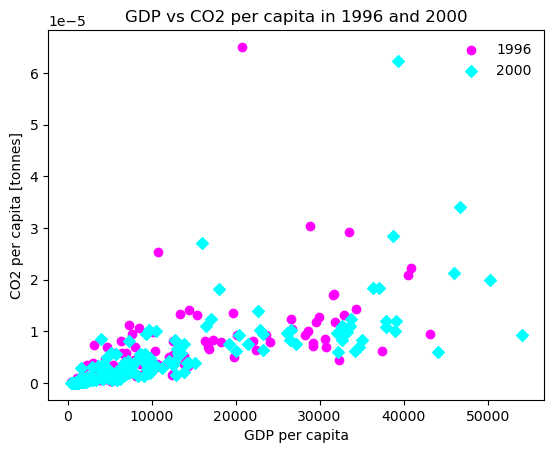

In [7]:
# plot bottom right - GDP vs CO2 per capita in 1996 and 2000
co2_data_2000 = co2_data[co2_data['year'] == 2000]
co2_data_1996 = co2_data[co2_data['year'] == 1996]

"""
world_df = co2_data[co2_data['country'] == "World"]
world_co2 = world_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
world_co2['co2_per_capita'] = world_co2['co2'] / world_co2['population']
"""

co2_per_capita_2000 = co2_data_2000['co2'] / co2_data_2000['population']
co2_per_capita_1996 = co2_data_1996["co2"] / co2_data_1996["population"]

gdp_per_capita_2000 = co2_data_2000["gdp"] / co2_data_2000['population']
gdp_per_capita_1996 = co2_data_1996["gdp"] / co2_data_1996["population"]

#now that we have all the gdp and co2 per capita we can plot it using the scatter plot function as we saw in class
plt.scatter(x=gdp_per_capita_1996, y=co2_per_capita_1996, color="fuchsia", label="1996") #we need to plot first the 96's values
plt.scatter(x=gdp_per_capita_2000, y=co2_per_capita_2000, color="cyan", label="2000", marker="D")#marker D for diamond (matplotlib shapes)

# x and y axis limits
#I don't know why but putting the limit axis as it was set before don't plot the graph as is it showed in the example
#here it's better to remove it 

#adding the legend
plt.legend(frameon=False, loc="upper right")

# main title and axis name
plt.title("GDP vs CO2 per capita in 1996 and 2000")
plt.xlabel("GDP per capita")
plt.ylabel("CO2 per capita [tonnes]")

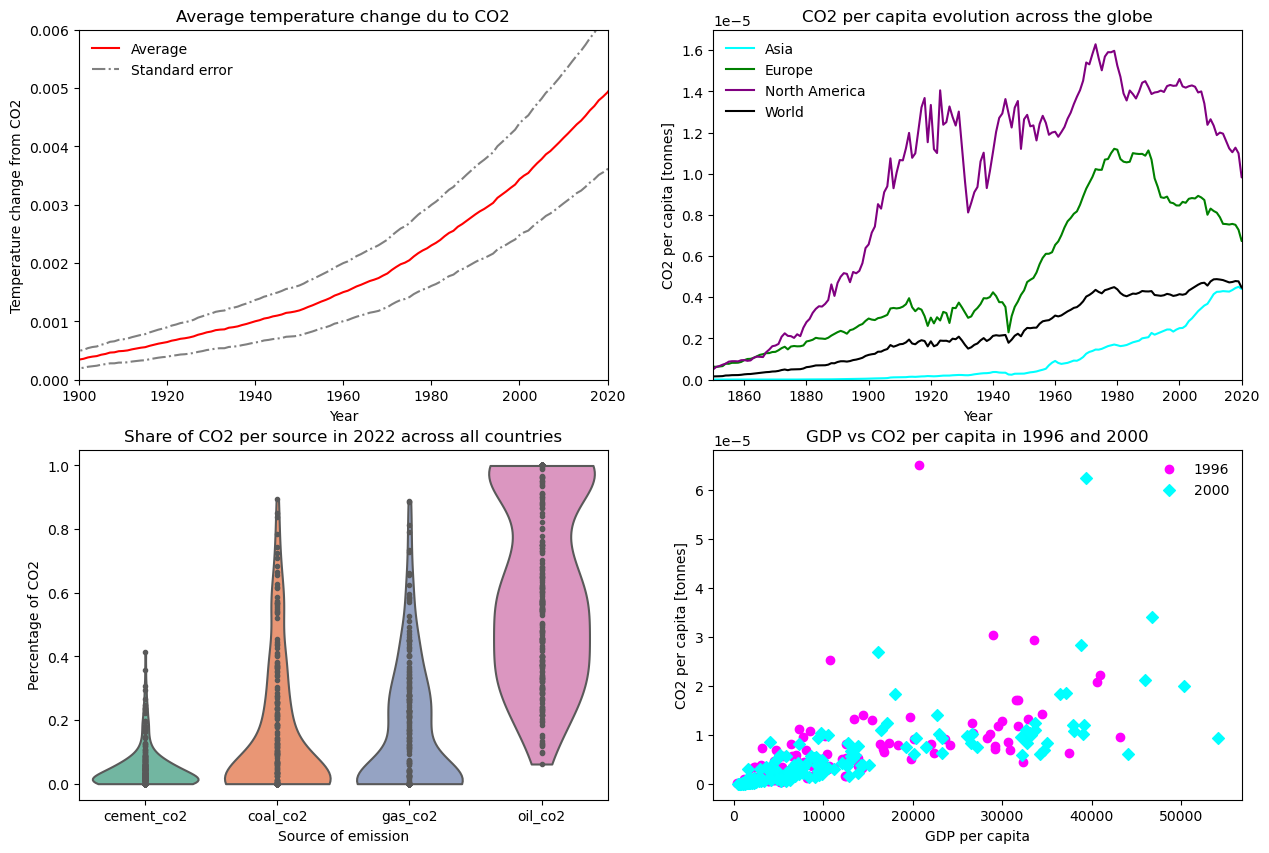

In [16]:
# putting everyting together and saving (jsp si on aura besoin de cette partie)
fig, ((UL, UR),(BL, BR)) = plt.subplots(2, 2, figsize=(15, 10))

### UPPER LEFT
# plot top left - average temperature chnage due to CO2
# first, we need the mean and the standard error
# To only keep countries, only keep row were iso code is not nan
co2_data_onlycountry = co2_data.dropna(subset=['iso_code'])
mean_avg_tmp_co2 = co2_data_onlycountry.groupby('year')['temperature_change_from_co2'].mean()
sem_avg_tmp_co2 = co2_data_onlycountry.groupby('year')['temperature_change_from_co2'].sem()

# x and y axis limits
UL.set_xlim(1900, 2020) 
UL.set_ylim(0, 0.006)
# main title and axis name
UL.set_title("Average temperature change du to CO2")
UL.set_xlabel("Year")
UL.set_ylabel("Temperature change from CO2")
# plot the three lines
UL.plot(mean_avg_tmp_co2, color = "red", linestyle = "-", label="Average")
UL.plot(mean_avg_tmp_co2 - sem_avg_tmp_co2, color = "grey", linestyle= "-.", label = "Standard error")
UL.plot(mean_avg_tmp_co2 + sem_avg_tmp_co2, color = "grey", linestyle= "-.")
# add legends
UL.legend(loc="upper left", frameon = False)



### UPPER RIGHT
# values for world
world_df = co2_data[co2_data['country'] == "World"]
world_co2 = world_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
world_co2['co2_per_capita'] = world_co2['co2'] / world_co2['population']

# values for asia
asia_df = co2_data[co2_data['country'] == "Asia"]
asia_co2 = asia_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
asia_co2['co2_per_capita'] = asia_co2['co2'] / asia_co2['population']

# values for europe
europe_df = co2_data[co2_data['country'] == "Europe"]
europe_co2 = europe_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
europe_co2['co2_per_capita'] = europe_co2['co2'] / europe_co2['population']

# values for north america
north_america_df = co2_data[co2_data['country'] == "North America"]
north_america_co2 = north_america_df.groupby('year').agg({'co2': 'sum', 'population': 'sum'})
north_america_co2['co2_per_capita'] = north_america_co2['co2'] / north_america_co2['population']

# plot top right - CO2 per capita evolution across the globe

# x and y axis limits
UR.set_xlim(1850, 2020) 
UR.set_ylim(0, 1.7*1e-5)
# main title and axis name
UR.set_title("CO2 per capita evolution across the globe")
UR.set_xlabel("Year")
UR.set_ylabel("CO2 per capita [tonnes]")
UR.plot(asia_co2['co2_per_capita'], color = "cyan", label = "Asia")
UR.plot(europe_co2['co2_per_capita'], color = "green", label = "Europe")
UR.plot(north_america_co2['co2_per_capita'], color = "purple", label = "North America")
UR.plot(world_co2['co2_per_capita'], color = "k", label = "World")
UR.legend(loc="upper left", frameon = False)



### BOTTOM LEFT
# plot bottom left - Share of CO2 per sources in 2022 across all countries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of CO2 emissions for each source
co2_data_2022 = co2_data[co2_data['year'] == 2022] #only selecting the year 2022

cement_percentage = co2_data_2022['cement_co2'] / co2_data_2022['co2']
coal_percentage = co2_data_2022['coal_co2'] / co2_data_2022['co2']
gas_percentage = co2_data_2022['gas_co2'] / co2_data_2022['co2']
oil_percentage = co2_data_2022['oil_co2'] / co2_data_2022['co2']

x_axis=["cement_co2"]*len(cement_percentage) + ["coal_co2"]*len(coal_percentage) + ["gas_co2"]*len(gas_percentage) + ["oil_co2"]*len(oil_percentage) #setting the title times the number of values of each percentage
#the ["value"] serves only to have string values of each sources, if we rename ["cement_co2"] by "A", the first source would be called "A"
#and we don't care because we already have the y axis with the good values (next line)
y_axis=[cement_percentage, coal_percentage, gas_percentage, oil_percentage]
#then the number of values of y_axis match the number of string values of the x_axis


merged_data = pd.DataFrame({
    'Source of emission':x_axis ,
    'Percentage of CO2': pd.concat(y_axis)
})


#no need to set the x and y limit as we cut already at 0

# main title and axis name
BL.set_title("Share of CO2 per source in 2022 across all countries")
BL.set_xlabel("Source of emission")
BL.set_ylabel("Percentage of CO2")

#plotting with seaborn
sns.violinplot(data=merged_data, x="Source of emission", y="Percentage of CO2", palette="Set2", inner="point", scale="width", cut=0, ax=BL)


### BOTTOM RIGHT
# plot bottom right - GDP vs CO2 per capita in 1996 and 2000
co2_data_2000 = co2_data[co2_data['year'] == 2000]
co2_data_1996 = co2_data[co2_data['year'] == 1996]

co2_per_capita_2000 = co2_data_2000['co2'] / co2_data_2000['population']
co2_per_capita_1996 = co2_data_1996["co2"] / co2_data_1996["population"]

gdp_per_capita_2000 = co2_data_2000["gdp"] / co2_data_2000['population']
gdp_per_capita_1996 = co2_data_1996["gdp"] / co2_data_1996["population"]

#now that we have all the gdp and co2 per capita we can plot it using the scatter plot function as we saw in class
BR.scatter(x=gdp_per_capita_1996, y=co2_per_capita_1996, color="fuchsia", label="1996") #we need to plot first the 96's values
BR.scatter(x=gdp_per_capita_2000, y=co2_per_capita_2000, color="cyan", label="2000", marker="D")#marker D for diamond (matplotlib shapes)

# x and y axis limits
#I don't know why but putting the limit axis as it was set before don't plot the graph as is it showed in the example
#here it's better to remove it 

#adding the legend
BR.legend(frameon=False, loc="upper right")

# main title and axis name
BR.set_title("GDP vs CO2 per capita in 1996 and 2000")
BR.set_xlabel("GDP per capita")
BR.set_ylabel("CO2 per capita [tonnes]")


###Final step... saving the final plot
fig.savefig("KoppOriane_ZahriReda.png")
